<a href="https://colab.research.google.com/github/amosTimi/amos_hamoye_solutions/blob/master/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Code below works when using colab

#url = 'https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv'
#fuel_data = pd.read_csv(url)
#fuel_data.head()
#fuel_data.to_csv('fuel_data.csv')

In [ ]:
# I have already downloaded the csv file, so I just import it normally with pd.read_csv()
fuel_data = pd.read_csv('fuel_data.csv',index_col=0)
fuel_data.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [ ]:
fuel_data.describe()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523.000000,29523.000000,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
mean,118.601836,2005.806050,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,74.178353,7.025483,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,1.000000,1994.000000,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,55.000000,2000.000000,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,122.000000,2006.000000,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,176.000000,2012.000000,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000
max,514.000000,2018.000000,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000


In [ ]:
fuel_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29523 entries, 0 to 29522
Data columns (total 11 columns):
record_id                       29523 non-null object
utility_id_ferc1                29523 non-null int64
report_year                     29523 non-null int64
plant_name_ferc1                29523 non-null object
fuel_type_code_pudl             29523 non-null object
fuel_unit                       29343 non-null object
fuel_qty_burned                 29523 non-null float64
fuel_mmbtu_per_unit             29523 non-null float64
fuel_cost_per_unit_burned       29523 non-null float64
fuel_cost_per_unit_delivered    29523 non-null float64
fuel_cost_per_mmbtu             29523 non-null float64
dtypes: float64(5), int64(2), object(4)
memory usage: 2.7+ MB


In [ ]:
fuel_data.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [ ]:
# only fuel_unit has null entries

In [ ]:
fuel_data['fuel_unit']

0        ton
1        ton
2        ton
3        ton
4        mcf
        ... 
29518    mcf
29519    mcf
29520    mcf
29521    ton
29522    mcf
Name: fuel_unit, Length: 29523, dtype: object

In [ ]:
fuel_data['fuel_unit'].dtype

dtype('O')

In [ ]:
# fuel_unit has dtype - object

In [ ]:
fuel_data['fuel_unit'].value_counts()

mcf       11354
ton        8958
bbl        7998
gramsU      464
mmbtu       180
kgU         110
mwhth       100
mwdth        95
gal          84
Name: fuel_unit, dtype: int64

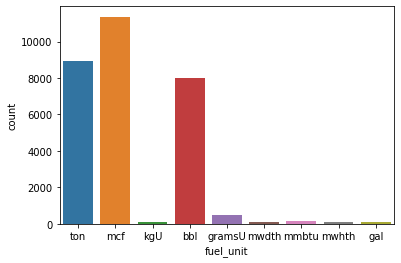

In [ ]:
sns.countplot(x='fuel_unit',data=fuel_data)

In [ ]:
# it's best to replace null values with the mode, which is mcf.

In [ ]:
fuel_data.groupby('fuel_type_code_pudl')['fuel_cost_per_unit_burned'].count()

fuel_type_code_pudl
coal        8547
gas        11486
nuclear      818
oil         8064
other        167
waste        441
Name: fuel_cost_per_unit_burned, dtype: int64

In [ ]:
fuel_data['fuel_type_code_pudl'].value_counts() # lists types of fuel used and number of times used

gas        11486
coal        8547
oil         8064
nuclear      818
waste        441
other        167
Name: fuel_type_code_pudl, dtype: int64

In [ ]:
# returns the burned or expended quantity of each fuel type
fuel_data.groupby(['fuel_type_code_pudl'])['fuel_cost_per_unit_burned'].sum().sort_values(ascending=False) 

fuel_type_code_pudl
nuclear    4053318.428
oil        1361824.819
coal        576254.381
gas         156891.829
waste         8607.492
other         3048.394
Name: fuel_cost_per_unit_burned, dtype: float64

In [ ]:
# code below returns the fuel_cost_per_unit _delivered for each year
fuel_data.groupby('report_year')['fuel_cost_per_unit_delivered'].sum()

report_year
1994    7.859053e+04
1995    3.931506e+04
1996    1.000602e+07
1997    1.218738e+07
1998    3.178799e+05
1999    2.682921e+04
2000    1.352903e+06
2001    8.142834e+04
2002    5.735121e+04
2003    6.740849e+04
2004    1.663129e+05
2005    5.258506e+04
2006    4.805125e+04
2007    5.476283e+04
2008    7.194631e+04
2009    7.975923e+05
2010    1.158381e+05
2011    7.412059e+04
2012    7.581617e+04
2013    2.065968e+05
2014    2.256952e+05
2015    3.569033e+05
2016    1.074344e+05
2017    4.587348e+04
2018    4.748057e+05
Name: fuel_cost_per_unit_delivered, dtype: float64

In [ ]:
# difference between 1994 and 1998
_98 = fuel_data[fuel_data['report_year']==1998]['fuel_cost_per_unit_delivered'].sum()
_94 = fuel_data[fuel_data['report_year']==1994]['fuel_cost_per_unit_delivered'].sum()

percent_change = ((_94 - _98)/_98)
percent_change

-0.7527666160428372

In [ ]:
# Kurtoisis and Skew of data - fuel_qty_burned

In [ ]:
from scipy.stats import kurtosis 
kurt = kurtosis(fuel_data['fuel_qty_burned'])
print("Kurtosis of fuel_quantity_burned column: {:.3f}".format(kurt))

Kurtosis of fuel_quantity_burned column: 651.259


In [ ]:
# skew::
_skew = fuel_data['fuel_qty_burned'].skew()
print("Skew value of fuel_qty_burned column: {:.3f}".format(_skew))

Skew value of fuel_qty_burned column: 15.851


In [ ]:
# correlation
cor = fuel_data.corr()
cor

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
utility_id_ferc1,1.000000,0.093323,-0.057447,-0.066946,-0.037863,-0.016414,0.006122
report_year,0.093323,1.000000,0.012952,-0.110853,0.013599,-0.014043,0.010261
fuel_qty_burned,-0.057447,0.012952,1.000000,-0.080946,-0.018535,-0.003551,-0.001896
fuel_mmbtu_per_unit,-0.066946,-0.110853,-0.080946,1.000000,-0.010034,-0.009039,-0.005884
fuel_cost_per_unit_burned,-0.037863,0.013599,-0.018535,-0.010034,1.000000,0.011007,-0.000437
fuel_cost_per_unit_delivered,-0.016414,-0.014043,-0.003551,-0.009039,0.011007,1.000000,-0.000109
fuel_cost_per_mmbtu,0.006122,0.010261,-0.001896,-0.005884,-0.000437,-0.000109,1.000000


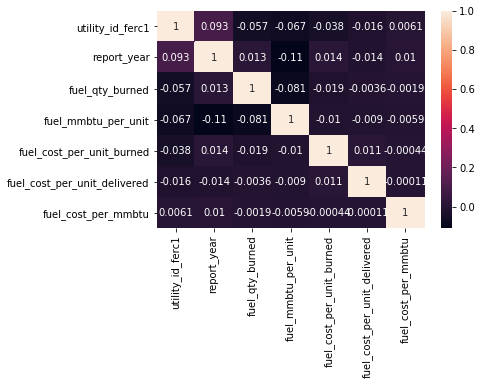

In [ ]:
sns.heatmap(cor,annot=True)

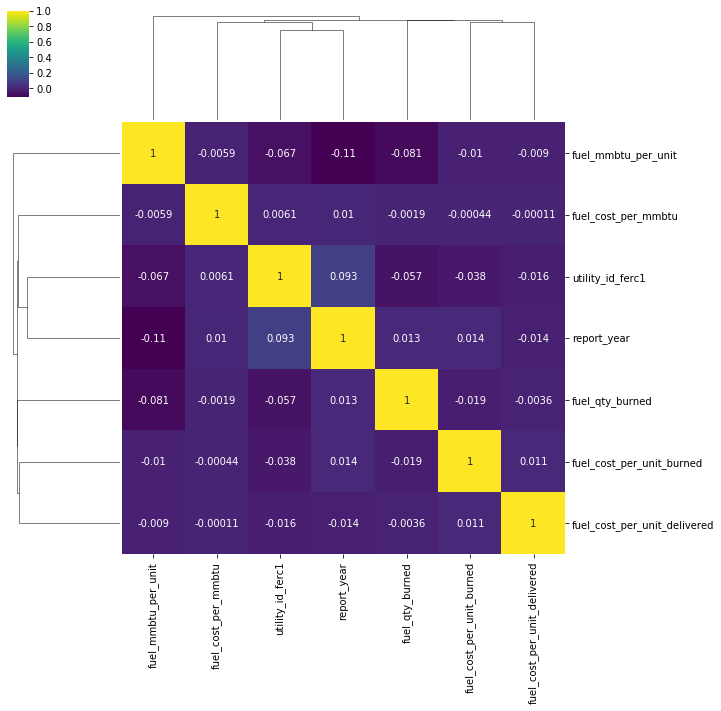

In [ ]:
# the heatmap of cor shows visually the correlation of each feature with the other
# this can also be visualised using cluster map

sns.clustermap(cor, annot=True, cmap='viridis')

In [ ]:
fuel_data.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [ ]:
fuel_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29523 entries, 0 to 29522
Data columns (total 11 columns):
record_id                       29523 non-null object
utility_id_ferc1                29523 non-null int64
report_year                     29523 non-null int64
plant_name_ferc1                29523 non-null object
fuel_type_code_pudl             29523 non-null object
fuel_unit                       29343 non-null object
fuel_qty_burned                 29523 non-null float64
fuel_mmbtu_per_unit             29523 non-null float64
fuel_cost_per_unit_burned       29523 non-null float64
fuel_cost_per_unit_delivered    29523 non-null float64
fuel_cost_per_mmbtu             29523 non-null float64
dtypes: float64(5), int64(2), object(4)
memory usage: 4.0+ MB


In [ ]:
# The info above shows the data type of the various features: object (categorical), int64 (numerical, binomial) and float64 (numerical,continuous)

In [ ]:
fuel_data.describe()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523.000000,29523.000000,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
mean,118.601836,2005.806050,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,74.178353,7.025483,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,1.000000,1994.000000,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,55.000000,2000.000000,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,122.000000,2006.000000,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,176.000000,2012.000000,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000
max,514.000000,2018.000000,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000


In [ ]:
# The describe method shows relevant statistical information concerning the dataset
# various percentile values, mean, standard deviation, etc.

In [ ]:
# this can be done individually: 
mean = fuel_data['fuel_cost_per_unit_burned'].mean()
std =  fuel_data['fuel_cost_per_unit_burned'].std()

print("For fuel_cost_per_unit_burned: \nmean: {:.2f} \nstandard deviation: {:.2f}".format(mean,std))

For fuel_cost_per_unit_burned: 
mean: 208.65 
standard deviation: 2854.49


In [ ]:
# passing include as a parameter in the .describe method helps to show statistics for non-numerical data type also, eg::
include = fuel_data.describe(include=['object'])
include

,record_id,plant_name_ferc1,fuel_type_code_pudl,fuel_unit
count,29523,29523,29523,29343
unique,29523,2315,6,9
top,f1_fuel_2002_12_6_0_10,big stone,gas,mcf
freq,1,156,11486,11354


In [ ]:
include.loc['top'] # to view highest values in  non-numerical columns

record_id              f1_fuel_2002_12_6_0_10
plant_name_ferc1                    big stone
fuel_type_code_pudl                       gas
fuel_unit                                 mcf
Name: top, dtype: object